In [4]:
import ROOT
import os
import glob
import csv
import numpy as np
import matplotlib.pyplot as plt

def reftime_quantify_1(infile):
    f = ROOT.TFile.Open(infile)

    if not f or f.IsZombie() or not f.IsOpen():
        print(f"Error opening file: {infile}")
        return

    T = f.Get("T")
    if not T:
        print(f"Error: Tree 'T' not found in file: {infile}")
        f.Close()
        return

    for ref_i in range(1, 5):
        print(f"hDCREF{ref_i}")

        signal_tot = T.GetEntries(f"T.hms.hDCREF{ref_i}_tdcTimeRaw && T.hms.hDCREF{ref_i}_tdcMultiplicity==1")

        print(f"Total signal (highest multiplicity) entries: {signal_tot}")

        background_tot = T.GetEntries(f"T.hms.hDCREF{ref_i}_tdcTimeRaw") - signal_tot

        print(f"Total background entries: {background_tot}")

        back_sig_ratio_tot = background_tot / signal_tot

        print(f"Total background/signal ratio (in percentage): {back_sig_ratio_tot * 100}")

        sig_lost_cut = T.GetEntries(f"T.hms.hDCREF{ref_i}_tdcTimeRaw<14800 && T.hms.hDCREF{ref_i}_tdcMultiplicity==1")
        sig_remain_cut = T.GetEntries(f"T.hms.hDCREF{ref_i}_tdcTimeRaw>=14800 && T.hms.hDCREF{ref_i}_tdcMultiplicity==1")
    
        signal_ratio_cut = sig_lost_cut / sig_tot

        background_remain_cut = T.GetEntries(f"T.hms.hDCREF{ref_i}_tdcTimeRaw>=14800") - sig_remain_cut

        back_sig_ratio_cut = background_remain_cut / sig_remain_cut
    
        print(f"Signal entries lost after the cut: {sig_lost_cut}")
        print(f"Signal entries remaining after the cut: {sig_remain_cut}")
        print(f"Signal loss ratio (in percentage): {signal_ratio_cut * 100}")
        print(f"Background/Signal ratio after cut applied (in percentage): {back_sig_ratio_cut * 100}")
        print("-------------------------------")

    for ref_i in range(1, 3):
        print(f"hT{ref_i}")

        branch_name = f"T.hms.hT{ref_i}_tdcMultiplicity"
        histogram = ROOT.TH1F("histogram", "Title;X-axis;Y-axis", 10, 0, 10)
        canvas = ROOT.TCanvas("canvas", "", 800, 600)
        T.Draw(f"{branch_name}>>histogram")
        del canvas
        
        max_bin = histogram.GetMaximumBin()
        x_max_mult = max_bin - 1

        signal_tot = T.GetEntries(f"T.hms.hT{ref_i}_tdcTimeRaw && T.hms.hT{ref_i}_tdcMultiplicity=={x_max_mult}")

        print(f"Total signal (highest multiplicity) entries: {signal_tot}")

        background_tot = T.GetEntries(f"T.hms.hT{ref_i}_tdcTimeRaw") - signal_tot

        print(f"Total background entries: {background_tot}")

        back_sig_ratio_tot = background_tot / signal_tot

        print(f"Total background/signal ratio (in percentage): {back_sig_ratio_tot * 100}")

        sig_lost_cut = T.GetEntries(f"T.hms.hT{ref_i}_tdcTimeRaw<1700 && T.hms.hT{ref_i}_tdcMultiplicity=={x_max_mult}")
        sig_remain_cut = T.GetEntries(f"T.hms.hT{ref_i}_tdcTimeRaw>=1700 && T.hms.hT{ref_i}_tdcMultiplicity=={x_max_mult}")
    
        signal_ratio_cut = sig_lost_cut / sig_tot

        background_remain_cut = T.GetEntries(f"T.hms.hT{ref_i}_tdcTimeRaw>=1700") - sig_remain_cut

        back_sig_ratio_cut = background_remain_cut / sig_remain_cut
    
        print(f"Signal entries lost after the cut: {sig_lost_cut}")
        print(f"Signal entries remaining after the cut: {sig_remain_cut}")
        print(f"Signal loss ratio (in percentage): {signal_ratio_cut * 100}")
        print(f"Background/Signal ratio after cut applied (in percentage): {back_sig_ratio_cut * 100}")
        print("-------------------------------")

        del histogram

    f.Close()


In [6]:
reftime_quantify_1("/lustre19/expphy/volatile/hallc/nps/singhav/ROOTfiles/NPS/TIMING/nps_hms_noReferenceTime_3013_1000000.root")

hDCREF1
Total signal (highest multiplicity) entries: 450142
Total background entries: 6610
Total background/signal ratio (in percentage): 1.4684255190584303
Signal entries lost after the cut: 149
Signal entries remaining after the cut: 449993
Signal loss ratio (in percentage): 0.03311162618085171
Background/Signal ratio after cut applied (in percentage): 0.2662263635212103
-------------------------------
hDCREF2
Total signal (highest multiplicity) entries: 450168
Total background entries: 6586
Total background/signal ratio (in percentage): 1.4630093653924756
Signal entries lost after the cut: 3707
Signal entries remaining after the cut: 446461
Signal loss ratio (in percentage): 0.8303076864496562
Background/Signal ratio after cut applied (in percentage): 0.27214023173356683
-------------------------------
hDCREF3
Total signal (highest multiplicity) entries: 450170
Total background entries: 6584
Total background/signal ratio (in percentage): 1.4625585889774975
Signal entries lost after 

Warning in <TClass::Init>: no dictionary for class THcRunParameters is available
Warning in <TClass::Init>: no dictionary for class THaRunParameters is available
Warning in <TClass::Init>: no dictionary for class THaEvent is available
Warning in <TClass::Init>: no dictionary for class THaEventHeader is available
Warning in <TClass::Init>: no dictionary for class Podd::MultiFileRun is available
Warning in <TClass::Init>: no dictionary for class THaRun is available
Warning in <TClass::Init>: no dictionary for class THaCodaRun is available
Warning in <TClass::Init>: no dictionary for class THaRunBase is available
Warning in <TClass::Init>: no dictionary for class DAQInfoExtra is available
Warning in <TClass::Init>: no dictionary for class DAQconfig is available
Warning in <TClass::Init>: no dictionary for class Podd::MultiFileRun::StreamInfo is available
Warning in <TClass::Init>: no dictionary for class Podd::MultiFileRun::FileInfo is available
Error in <TList::Clear>: A list is accessin

In [4]:
import ROOT
import os
import glob

import csv

def process_file(filepath, run_number):
    results = {}
    
    f = ROOT.TFile.Open(filepath)
    if not f or f.IsZombie() or not f.IsOpen():
        print(f"Error opening file: {filepath}")
        return results
    
    print("Run number: ", run_number)

    T = f.Get("T")
    if not T:
        print(f"Error: Tree 'T' not found in file: {filepath}")
        f.Close()
        return results

    for ref_i in range(1, 5):
        signal_tot = T.GetEntries(f"T.hms.hDCREF{ref_i}_tdcTimeRaw && T.hms.hDCREF{ref_i}_tdcMultiplicity==1")
        background_tot = T.GetEntries(f"T.hms.hDCREF{ref_i}_tdcTimeRaw") - signal_tot
        back_sig_ratio_tot = background_tot / signal_tot if signal_tot else 0

        sig_lost_cut = T.GetEntries(f"T.hms.hDCREF{ref_i}_tdcTimeRaw<14400 && T.hms.hDCREF{ref_i}_tdcMultiplicity==1")
        sig_remain_cut = T.GetEntries(f"T.hms.hDCREF{ref_i}_tdcTimeRaw>=14400 && T.hms.hDCREF{ref_i}_tdcMultiplicity==1")
        signal_ratio_cut = sig_lost_cut / signal_tot if signal_tot else 0

        background_remain_cut = T.GetEntries(f"T.hms.hDCREF{ref_i}_tdcTimeRaw>=14400") - sig_remain_cut
        back_sig_ratio_cut = background_remain_cut / sig_remain_cut if sig_remain_cut else 0

        results[f"hDCREF{ref_i}_total_back_sig_ratio"] = back_sig_ratio_tot * 100
        results[f"hDCREF{ref_i}_sig_lost_cut_ratio"] = signal_ratio_cut * 100
        results[f"hDCREF{ref_i}_back_sig_ratio_cut"] = back_sig_ratio_cut * 100

    for ref_i in range(1, 3):
        branch_name = f"T.hms.hT{ref_i}_tdcMultiplicity"
        histogram = ROOT.TH1F("histogram", "Title;X-axis;Y-axis", 10, 0, 10)
        canvas = ROOT.TCanvas("canvas", "", 800, 600)
        T.Draw(f"{branch_name}>>histogram")
        del canvas

        max_bin = histogram.GetMaximumBin()
        x_max_mult = max_bin - 1

        signal_tot = T.GetEntries(f"T.hms.hT{ref_i}_tdcTimeRaw && T.hms.hT{ref_i}_tdcMultiplicity=={x_max_mult}")
        background_tot = T.GetEntries(f"T.hms.hT{ref_i}_tdcTimeRaw") - signal_tot
        back_sig_ratio_tot = background_tot / signal_tot if signal_tot else 0

        sig_lost_cut = T.GetEntries(f"T.hms.hT{ref_i}_tdcTimeRaw<1700 && T.hms.hT{ref_i}_tdcMultiplicity=={x_max_mult}")
        sig_remain_cut = T.GetEntries(f"T.hms.hT{ref_i}_tdcTimeRaw>=1700 && T.hms.hT{ref_i}_tdcMultiplicity=={x_max_mult}")
        signal_ratio_cut = sig_lost_cut / signal_tot if signal_tot else 0

        background_remain_cut = T.GetEntries(f"T.hms.hT{ref_i}_tdcTimeRaw>=1700") - sig_remain_cut
        back_sig_ratio_cut = background_remain_cut / sig_remain_cut if sig_remain_cut else 0

        results[f"hT{ref_i}_total_back_sig_ratio"] = back_sig_ratio_tot * 100
        results[f"hT{ref_i}_sig_lost_cut_ratio"] = signal_ratio_cut * 100
        results[f"hT{ref_i}_back_sig_ratio_cut"] = back_sig_ratio_cut * 100

        del histogram

    f.Close()
    return results

def process_directory(directory, output_txt, output_csv):
    file_pattern = os.path.join(directory, "nps_hms_noReferenceTime_*.root")
    runs = {}

    for filepath in glob.glob(file_pattern):
        filename = os.path.basename(filepath)
        run_number = filename.split('_')[3]
        results = process_file(filepath, run_number)
        if results:
            runs[run_number] = results
            
    # Sort runs by run number
#     sorted_runs = sorted(runs.items())

    with open(output_txt, 'w') as txt_file, open(output_csv, 'w', newline='') as csv_file:
        txt_writer = txt_file.write
        csv_writer = csv.writer(csv_file)

        headers = ["run number"] + [key for key in next(iter(runs.values())).keys()]
        txt_writer(" ".join(headers) + "\n")
        csv_writer.writerow(headers)

        for run_number, results in runs.items():
            row = [run_number] + [results[key] for key in headers[1:]]
            txt_writer(" ".join(map(str, row)) + "\n")
            csv_writer.writerow(row)

# Usage
directory = "/lustre19/expphy/volatile/hallc/nps/singhav/ROOTfiles/NPS/TIMING"
output_txt = "/u/group/nps/singhav/nps_analysis/det_calibrations/output_reftime.txt"
output_csv = "/u/group/nps/singhav/nps_analysis/det_calibrations/output_reftime.csv"
process_directory(directory, output_txt, output_csv)


Run number:  5894
Run number:  5428
Run number:  2976
Run number:  2195
Run number:  2770
Run number:  2023
Run number:  4551
Run number:  6687
Run number:  2411
Run number:  2340
Run number:  6475
Run number:  5992
Run number:  3430
Error: Tree 'T' not found in file: /lustre19/expphy/volatile/hallc/nps/singhav/ROOTfiles/NPS/TIMING/nps_hms_noReferenceTime_3430_-1.root
Run number:  5244
Run number:  3162
Run number:  6794
Run number:  4254
Run number:  5098
Run number:  2057
Run number:  3635
Run number:  1692
Run number:  3654
Run number:  6991
Run number:  4015
Run number:  5974
Run number:  6965
Run number:  6873
Run number:  6932
Run number:  6428
Run number:  5904
Run number:  4458
Run number:  4972
Run number:  6402
Run number:  3017
Run number:  6861
Run number:  1598
Run number:  6921
Run number:  6810
Run number:  3913
Run number:  3828
Run number:  3098
Run number:  4845
Run number:  3942
Run number:  5286
Run number:  4668
Run number:  4064
Run number:  3010
Run number:  4226

Error in <TList::Clear>: A list is accessing an object (0x55fcdfebd540) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x55fcdfd56f90) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x55fcdf9710b0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x55fcdf964520) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x55fcdf92b9d0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x55fcdf898710) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x55fcde3725a0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x55fcdff7dcd0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x55fcdf7db420) already deleted (list name = TList)
Error in <TList::Clear>: A l

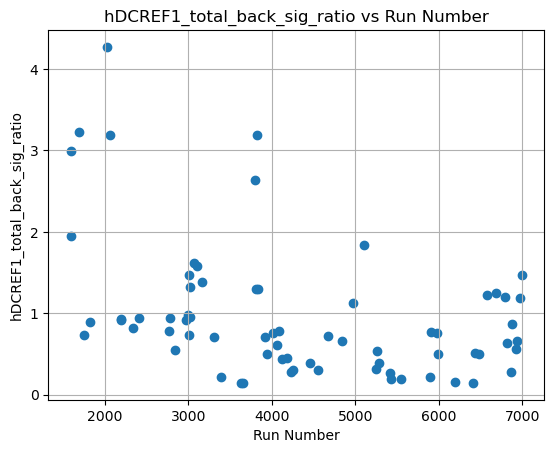

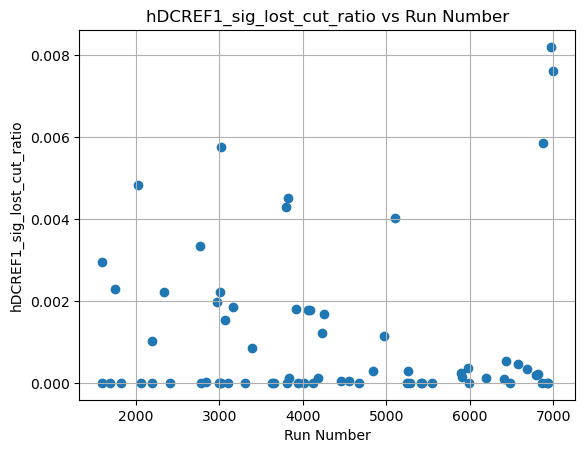

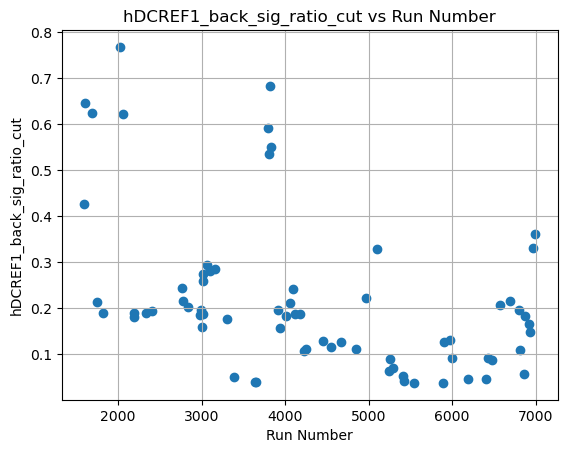

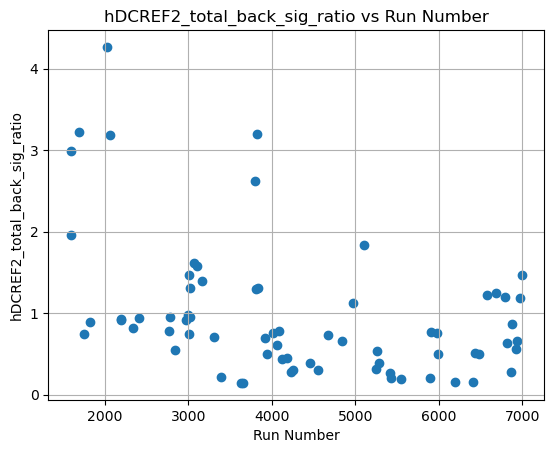

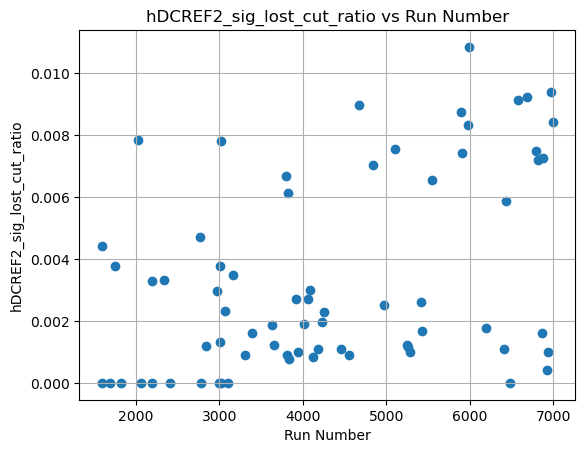

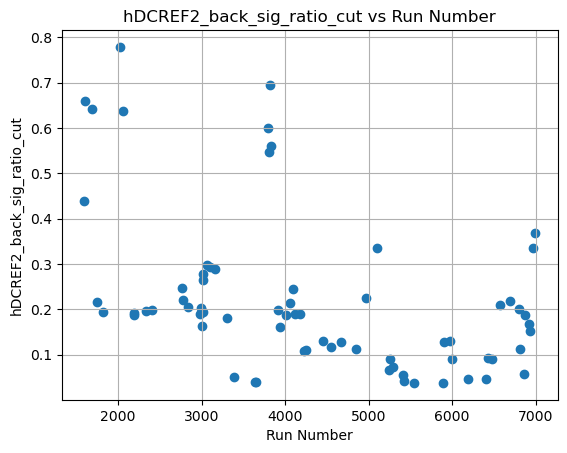

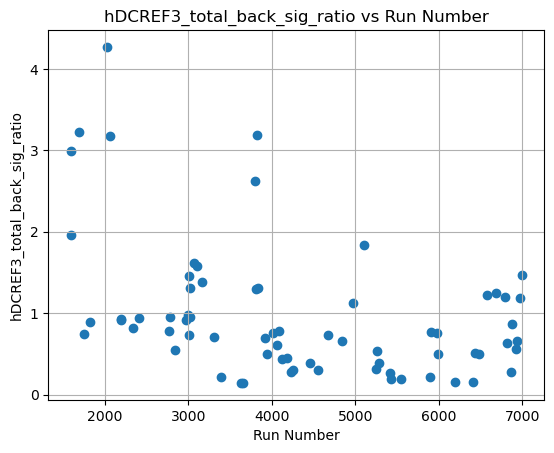

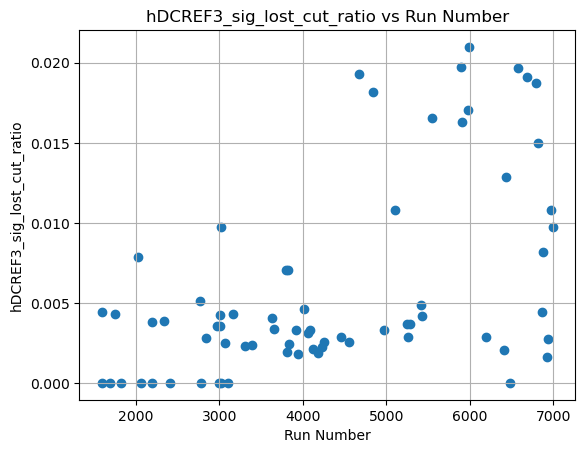

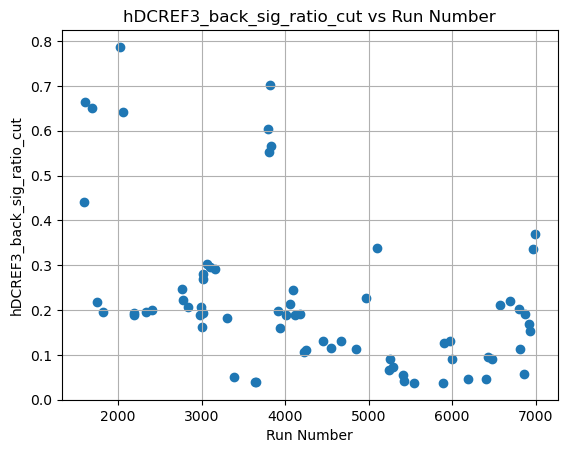

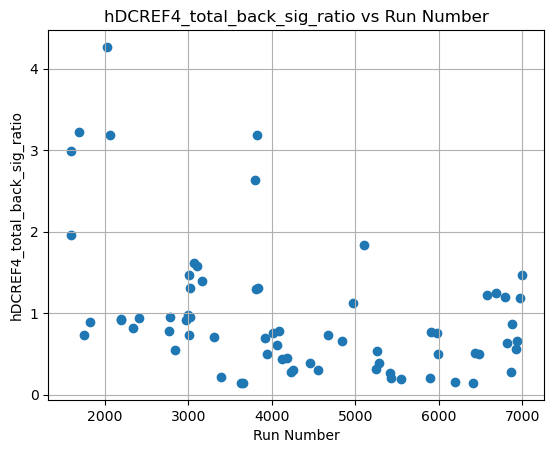

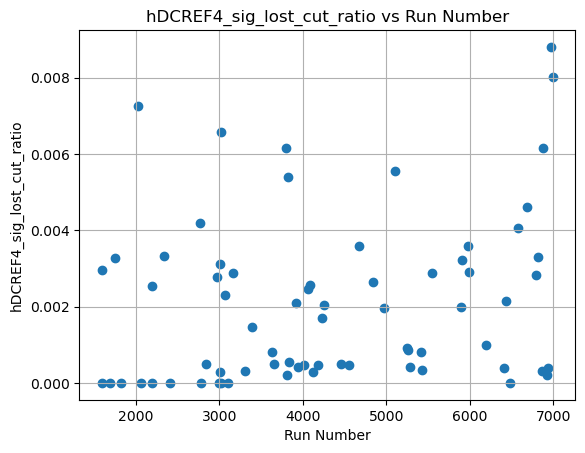

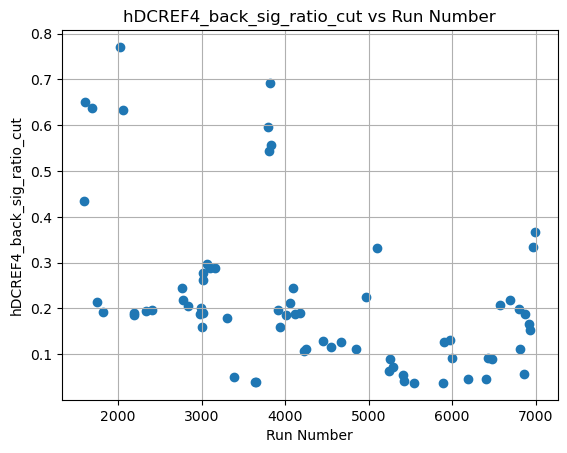

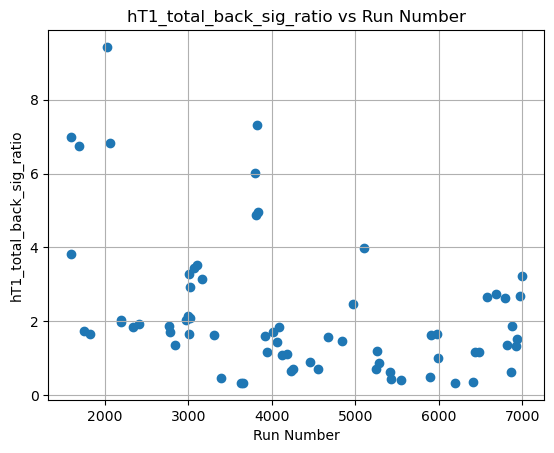

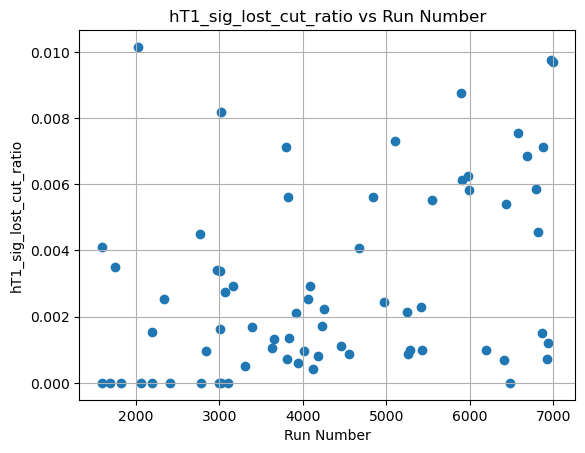

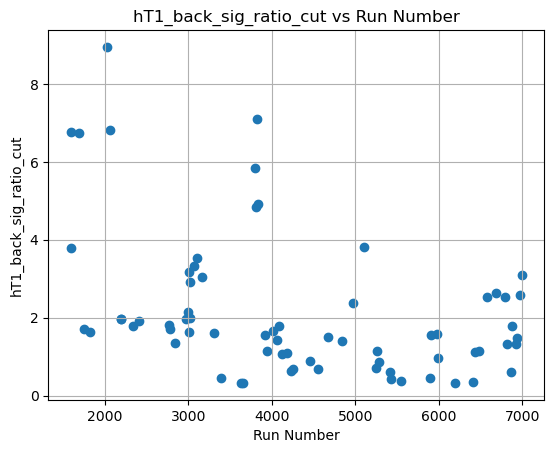

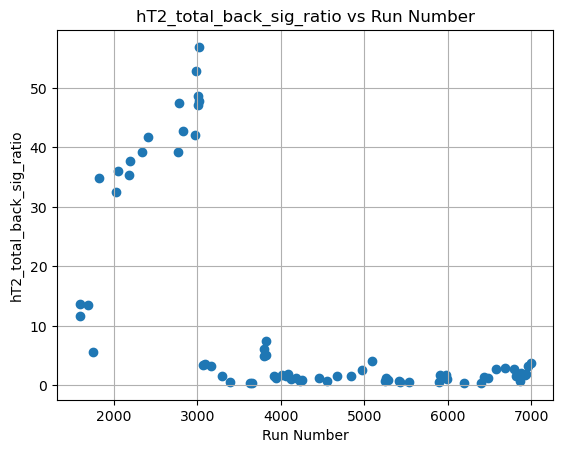

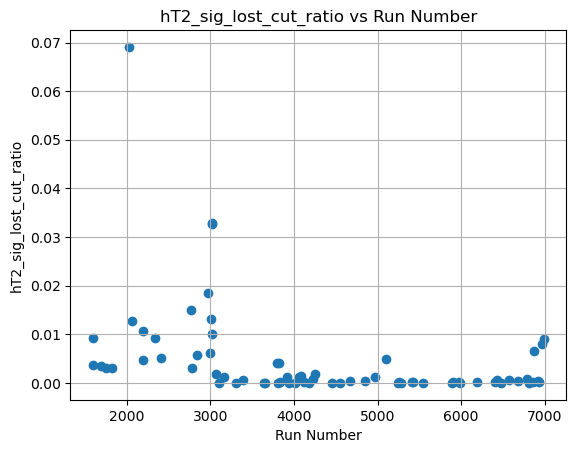

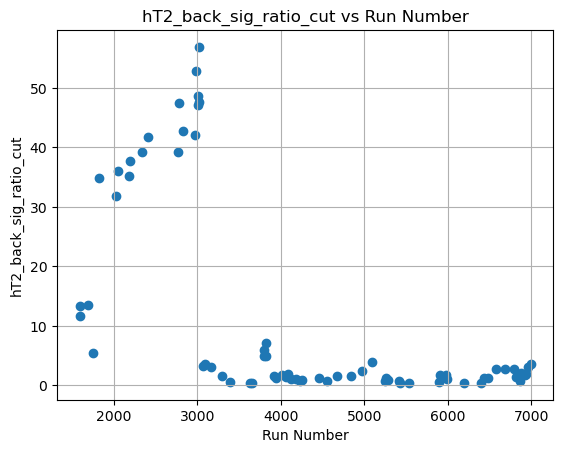

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_file = '/u/group/nps/singhav/nps_analysis/det_calibrations/output_reftime.csv'
df = pd.read_csv(csv_file)

# List of headers to plot (excluding 'run number')
headers = df.columns[1:]

# Plot each header against 'run number'
for header in headers:
    plt.figure()
    plt.scatter(df['run number'], df[header], marker='o')
    plt.xlabel('Run Number')
    plt.ylabel(header)
    plt.title(f'{header} vs Run Number')
    plt.grid(True)
#     plt.savefig(f'{header}_vs_RunNumber.png')
    plt.show()
